1. [Choosing types of EC2 Instances plan (Elastic Compute)](#choosing-types-of-ec2-instances-plan--elastic-compute)
2. [EC2 Operations](#ec2-operations)
3. [EC2 attributes within](#ec2-attributes-within)
4. [EC2 Instance types](#ec2-instance-types)
5. [Launching an EC2 instance](#launching-an-ec2-instance)
6. [Key-Pair](#key-pair)
7. [Network Settings](#network-settings)
8. [Bootstrapping User Data Script](#bootstrapping-user-data-script)
9. [After Launching an EC2 instance](#after-launching-an-ec2-instance)
10. [Firewall](#firewall)
11. [Network Rules](#network-rules)
12. [Relationship between SG & instances](#relationship-between-sg--instances)
13. [SSH rules](#ssh-rules)
14. [If Application unaccessible and timeout](#if-application-unaccessible-and-timeout)
15. [If connection refused](#if-connection-refused)
16. [Port ranges](#port-ranges)
17. [SSH into instance from Linux/Mac](#ssh-into-instance-from-linuxmac)
18. [SSH into instance from Windows less than 10](#ssh-into-instance-from-windows-less-than-10)
19. [SSH into instance from Windows equal or greater than 10](#ssh-into-instance-from-windows-equal-or-greater-than-10)
20. [EC2 Instance Connect](#ec2-instance-connect)
21. [Attach IAM roles to EC2 instance](#attach-iam-roles-to-ec2-instance)

#### Choosing types of EC2 Instances plan (Elastic Compute):

- Spot Instances
- On Demand Instances
- Reserved Instances

Spot Instances:
- EC2 instances are temporarily allocated
- Can be terminated at any time
- Same instance will not be allocated when we terminate and launch a new instance
- Cheaper

On-Demand Instance:
- Used only during high load/traffic time
- Once the load is back to normal the instances will be terminated
- very expensive
- Pricing is charged minute/hourly based on the usage
- No upfront payments

Reserved Instance:
- EC2 instances are reserved completely
    - Convertible Reserved Instance
        - The instance type, platform, scope, tenancy, etc can be changed after creation
    - Standard Reserved Instance
        - The instance type, platform, scope, tenancy, etc cannot be changes after creation
- expensive but not the highest
- Standard pricing for the instances irrespective if the instances are used or not
- upfront or partially upfront or no upfront payments.


EC2 Savings Plan:

EC2 Dedicated Hosts:

EC2 Dedicated Instance:

EC2 Capacity Reservations:

#### EC2 Operations:
- Launching EC2
- Terminating EC2
- Hibernate EC2
- Stopping EC2

#### EC2 attributes within:

- AMI (OS => Linux OS, MacOS, Windows OS) => Amazon Machine Image
- Security groups
- ASG (Auto Scaling groups)
- EFS (Elastic File System)
- ELB (Elastic Load Balancer)
- Target Groups
- Bootstrapping User Data Script
- EBS (Elastic Block Storage)
- Launch Template

#### EC2 Instance types:
- General Purpose
- Compute Optimized
- Memory Optimized
- Storage Optimized

Eg: EC2 Instance => m5.2XLarge
- m -> Instance
- 5 -> generation
- 2XLarge -> size

URL to check instance type pricing and infrastructure: 
- ec2instances.info

#### Launching an EC2 instance:

#### Network Settings:
- If we have set rules for http and not for https, then make sure to use http in the URL instead of https for the data to load via public IPS address provided after EC2 is created.

#### Key-Pair:
- Key-Pair is used by the user / services to SSH into the EC2 instance whenever
- .pem:
    - used by linux and windows 10 and higher
- .ppk:
    - used by windows 9 and lower

#### Bootstrapping User Data Script:
- Will be run only once every time while booting the EC2 instance
- Bootstrapping user data script can be configured while launching an EC2 instance or can be modified as well.

#### After Launching an EC2 instance:
- We can find all the details of the instance
    - Under Details:
        - Instance id
        - Public & Private IPs
        - DNS
        - VPC ID
        - Subnet ID
        - Security Group
        - ASG
        - AMI id
        - Instance type
        - Root volume
        - Platform
        - Key Pair


#### Firewall:
- Stateful 
- Stateless

Statefull:
- The user state is stored in the respective webserver eg: webserver-1
- If the webserver-1 crashes then, the user state is lost
- Security groups
    - Instance level
    - accepts only allow rules
    - can be modified any time
    - evaluate all rules before deciding whether to allow traffic
    - can reference rules by IPs or other security groups
    - default, blocks all input traffic and allows all output traffic

Stateless:
- The user state is not stored in the respective webserver eg: webserver-1 instead in a cache or shared storage
- If the webserver-1 crashes then, the user state is not lost.
- Network ACLs
    - subnet level
    - accepts allow rules and deny rules
    - cannot be modified any time unless disassociating the network ACL from the subnet
    - evaluate rules in order, starting with the lowest numbered rule

Both security groups and Network ACLs are within the VPC


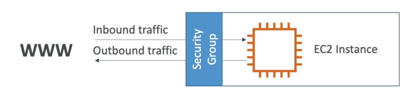

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/SG.jpeg')
new_image = img.resize((420, 100))
display(new_image)

#### Network Rules:
- Inbound rules:
    - Inbound rules control traffic that comes into the instances or services

- Outbound rules:
    - Outbound rules control traffic that leaves the instances or services

Security groups and Network ACLs have both inbound and outbound rules

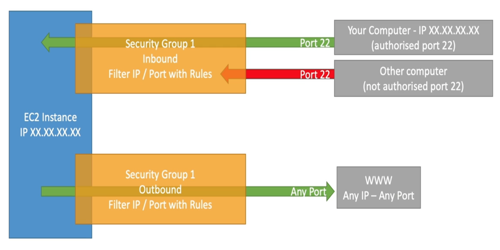

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/NWRules.jpeg')
new_image = img.resize((500, 250))
display(new_image)

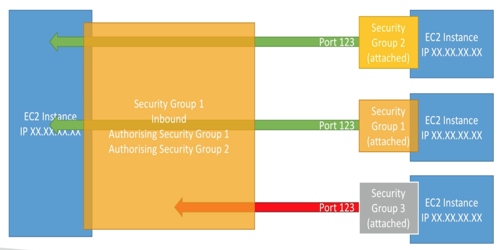

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/NWRules2.jpeg')
new_image = img.resize((500, 250))
display(new_image)

#### Relationship between SG & instances:
- One-to-Many
- Many-to-One

#### SSH rules:
- Always keep a separate Security group for SSH rules

#### If Application unaccessible and timeout:
- Due to Security Groups permission issues

#### If connection refused:
- Application crash / failure issues

#### Port ranges:
- `80` => (HTTP)
- `443` => (HTTPS)
- `22` => (SSH)
- `21` => (FTP)
- `22` => (SFTP -> Secure file transfer protocol)
- `3389` => (RDP -> Remote Desktop Protocol i.e. Windows)
- `2409` => NFS
- `4567` => Health Check

#### SSH:

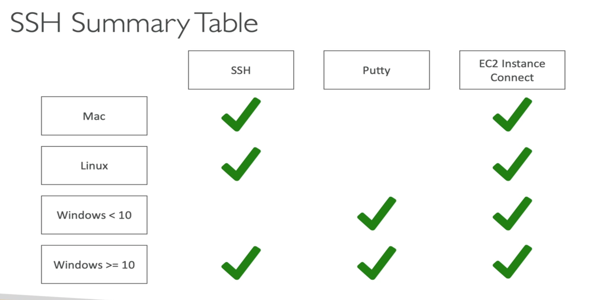

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/SSH.jpeg')
new_image = img.resize((600, 300))
display(new_image)

#### SSH into instance from Linux/Mac:

- ssh ec2-user@publicIP
    - eg: ssh ec2-user@3.250.26.200
    - will fail if we have not yet uploaded the .pem file with authentication failures

- go the folder in the terminal which consist of the .pem file (mandatory)
- ssh -i ec2tutorial.pem ec2-user@3.250.26.200
    - given ec2tutorial.pem is the .pem file which was saved during Key pair creation during EC2 instance launching.
    - make sure to also provide the necessary permission
        - eg: chmod 400 ec2tutorial.pem

#### SSH into instance from Windows less than 10:
- Putty:
    - Install Putty
        - Putty App
        - PuttyGen
    - Open Putty Gen
        - Load (even if the file is not saved in .ppk format it will work)
        - Save private key (passphrase and save it with .ppk extension)
    - Open Putty App
        - Hostname (public ip of the instance trying to access via ssh)
        - port: 22
        - connection type: ssh 
        - saved session: give it a name and save it
        - Now click the saved session
            - Not working when we type ec2-user
        - Try to load the saved session
        - Edit the hostname to ec2-user@ + public ip and save it again
        - From category (left side), go to SSH
            - Auth
            - upload the private key file for authentication (.ppk file)
            - Before clicking Open go the session and save it to avoid redo of steps
            - Now click Open

- Every time while connecting the EC2 instance, in putty always load the session first and then open 

#### SSH into instance from Windows equal or greater than 10:

- ssh ec2-user@publicIP
    - eg: ssh ec2-user@3.250.26.200
    - will fail if we have not yet uploaded the .pem file with authentication failures

- go the folder in the terminal which consist of the .pem/.ppk file (mandatory)
- ssh -i ec2tutorial.pem ec2-user@3.250.26.200
    - given ec2tutorial.pem/.ppk is the .pem/.ppk file which was saved during Key pair creation during EC2 instance launching.
    - make sure to also provide the necessary permission
        - Right-click the .pem/.ppk file and select properties 
        - Go to security tab and select Advanced
        - Check for Name and owner information
            - if change required, click change
                - check object types
                - check locations
                - If needed enter the object name with username and click ok
            - Under permission entities, check for the user name with allow access type
            - Remove other entities from permissions
            - Disable inheritance
            - If we disable all inheritance, then add new object from scratch with username by selecting a principal
            - Check names existing from the select principal option
            - Give necessary permissions to the user principal selected and press OK

#### EC2 Instance Connect:
- It's available from AWS Management Console inside the Elastic Compute
- On the top, we have connect option to connect to the instance
    - EC2 Instance connect
    - SSH Client
    - Session Manager
    - EC2 serial console

Note:
- Never setup AWS CLI on EC2 instance connect

#### Attach IAM roles to EC2 instance:
- The already created IAM role accessing IAM Read permission is being attached with EC2
    - Select instance
    - Choose Action
        - Security -> Modify IAM role
            - Create or Choose existing IAM role
            - Click Save
- Now, while using EC2 instance connect, we can run the "aws iam list-users" command
